#  Part 1: Linear Regression

In [414]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [415]:
#importing necessary libary
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,decomposition
import plotly.express as px
from sklearn.preprocessing import StandardScaler


In [416]:
#mounting data from google drive
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [417]:
adversdata=pd.read_csv("/content/drive/MyDrive/Classroom/Ai final /9.csv")

In [418]:
adversdata.head()

,TV,Radio,Social Media,Influencer,Sales
0,16,6.566231,2.907983,Mega,54.732757
1,13,9.237765,2.409567,Mega,46.677897
2,41,15.886446,2.913410,Mega,150.177829
3,83,30.020028,6.922304,Mega,298.246340
4,15,8.437408,1.405998,Micro,56.594181


In [419]:
# dropping Influencer column
adversdata=adversdata.drop("Influencer",axis=1)
adversdata

,TV,Radio,Social Media,Sales
0,16,6.566231,2.907983,54.732757
1,13,9.237765,2.409567,46.677897
2,41,15.886446,2.913410,150.177829
3,83,30.020028,6.922304,298.246340
4,15,8.437408,1.405998,56.594181
...,...,...,...,...
4567,26,4.472360,0.717090,94.685866
4568,71,20.610685,6.545573,249.101915
4569,44,19.800072,5.096192,163.631457
4570,71,17.534640,1.940873,253.610411


In [420]:
adversdata.corr()["Sales"]

TV              0.997049
Radio           0.869105
Social Media    0.528906
Sales           1.000000
Name: Sales, dtype: float64

In [421]:
adversdata.shape

(4572, 4)

In [422]:
adversdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4572 non-null   int64  
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Sales         4566 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 143.0 KB


In [423]:
adversdata.describe()

,TV,Radio,Social Media,Sales
count,4572.000000,4568.000000,4566.000000,4566.000000
mean,54.058618,18.160356,3.323956,192.466602
std,26.101674,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [424]:
adversdata.isnull().sum()

TV              0
Radio           4
Social Media    6
Sales           6
dtype: int64

This data set includes columns for television, radio, social media, and sales. We checked isnull() in the above cell and discovered that 4 values of column are missing from Radion, 6 values from Social Media, and 6 values from Sales are missing.





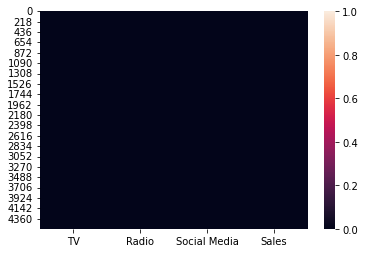

In [425]:
#plotting null value in heatmap
sns.heatmap(adversdata.isnull())

In [426]:
#dropping rows from dataset that contain missing value of atleast one
adversdata.dropna(inplace=True)
adversdata

,TV,Radio,Social Media,Sales
0,16,6.566231,2.907983,54.732757
1,13,9.237765,2.409567,46.677897
2,41,15.886446,2.913410,150.177829
3,83,30.020028,6.922304,298.246340
4,15,8.437408,1.405998,56.594181
...,...,...,...,...
4567,26,4.472360,0.717090,94.685866
4568,71,20.610685,6.545573,249.101915
4569,44,19.800072,5.096192,163.631457
4570,71,17.534640,1.940873,253.610411


In [427]:
#id else condition
if adversdata.TV.shape == adversdata.Radio.shape == adversdata["Social Media"].shape ==adversdata.Sales.shape:
  print("Continue Here")
else:
  print("Error: Retry ")

Continue Here


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



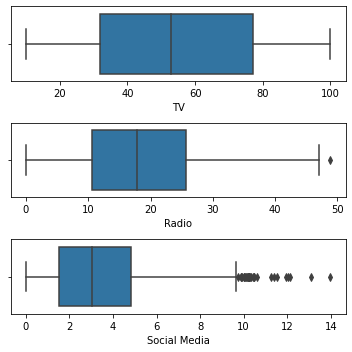

In [428]:
# boxplot figure
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(adversdata['TV'], ax = axs[0])
plt2 = sns.boxplot(adversdata['Radio'], ax = axs[1])
plt3 = sns.boxplot(adversdata['Social Media'], ax = axs[2])
plt.tight_layout()


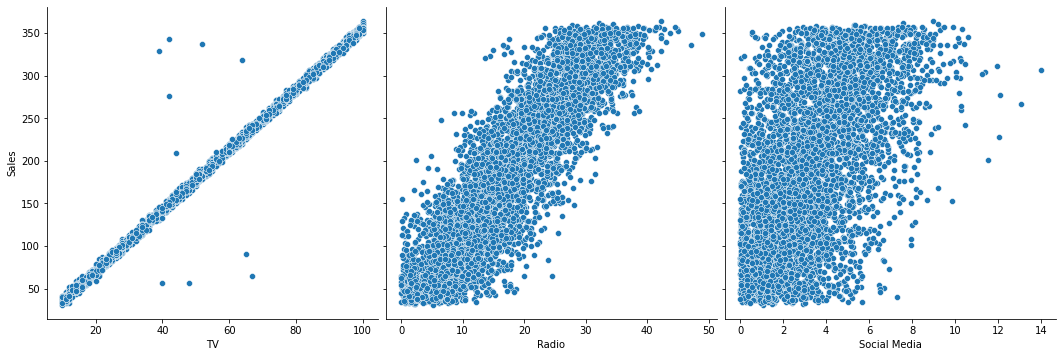

In [429]:
sns.pairplot(adversdata, x_vars=['TV', 'Radio', 'Social Media'], y_vars='Sales', height=5, aspect=1, kind='scatter')
# Display the Pairplot 
plt.show()

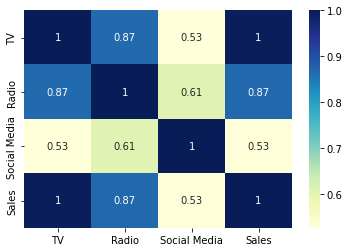

In [430]:
# matrix correlation # Heatmap function 
sns.heatmap(adversdata.corr(), cmap="YlGnBu", annot = True)
# Displaying the pairplot
plt.show()

In [431]:
#sepreation of target variable and feature variable
x = adversdata.iloc[:, :-1]
y = adversdata.iloc[:, -1]

In [432]:
# scaling to the independent variable 
sc = preprocessing.StandardScaler()
x = sc.fit_transform(X)
x

array([[-1.4592268 , -1.19900662, -0.18830063],
       [-1.57426347, -0.9227668 , -0.41361192],
       [-0.50058792, -0.2352851 , -0.18584715],
       ...,
       [-0.38555126,  0.1693886 ,  0.8008904 ],
       [ 0.64977873, -0.06485981, -0.62548742],
       [-0.46224237, -0.22698803,  0.77844847]])

In [433]:
#  spliting the 'X' and 'y' datasets into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print("X - train shape-",X_train.shape)
print("X - test shape-",X_train.shape)
print("Y - train shape-",y_train.shape)
print("Y - test shape-",y_test.shape)

X - train shape- (3189, 3)
X - test shape- (3189, 3)
Y - train shape- (3189,)
Y - test shape- (1367,)


In [434]:
#Calculating the cost function
def cost_function(X, y, w, b):

    cost = np.sum((((X.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

In [435]:

def gradient_descent_function(X, y, w, b, alpha=0.01, epochs=1000):

    m = len(y)
    costs = [0] * epochs
    
    for epoch in range(epochs):
        z = X.dot(w) + b
        
        loss = z - y
        
        weight_gradient = X.T.dot(loss) / m
        bias_gradient = np.sum(loss) / m
        
        w = w - alpha*weight_gradient
        b = b - alpha*bias_gradient
        
        cost = cost_function(X, y, w, b)
        costs[epoch] = cost
        
    return w, b, costs

In [436]:
w = np.random.randn(X_train.shape[1])
bias = 0


In [437]:
# printing bias
weights, bias, costs = gradient_descent_function(X_train, y_train, w, bias, epochs=1000);
print(weights)
print(bias)

[80.06783239 14.10232955 -1.74901004]
192.38544259237315


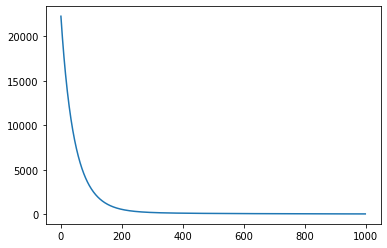

In [438]:
#visualizing of cost values
plt.plot(costs)
plt.show()

In [439]:
def predict(X,w,b):
  return X.dot(w)+b

In [440]:

# R2 
def r2score(y_pred, y):
  
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

In [441]:
y_pred=predict(X_test,weights,bias)

In [442]:

r2=r2score(y_pred, y_test)
print(r2)

0.9883527919262566


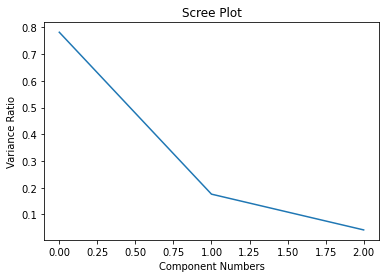

In [443]:
# Applying  Principal Component Analysis to your data
pca = decomposition.PCA()
pca.fit(X)

## Plotting Component Number and  Variance Ratio
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Component Numbers")
plt.ylabel("Variance Ratio")
plt.title("Scree Plot")
plt.show()

In [444]:
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X_reduced

array([[-1.70806269,  0.82075601],
       [-1.72195533,  0.60490828],
       [-0.5395397 ,  0.13020363],
       ...,
       [ 0.28427282,  0.80815012],
       [ 0.02799884, -0.80568361],
       [-0.01745545,  0.93174481]])

In [445]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.3)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3189, 2) (1367, 2) (3189,) (1367,)


In [446]:
# Initial weights
w = np.random.randn(X_train.shape[1])
# Initial bias
bias = 0


In [447]:
weights, bias, costs = gradient_descent_function(X_train, y_train, w, bias, epochs=1000);
print(weights)
print(bias)


[ 55.84403951 -40.60417111]
192.31654392343486


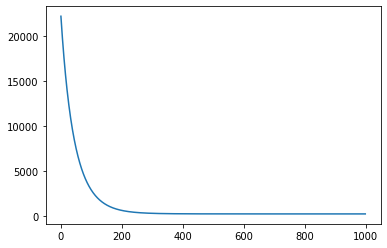

In [448]:
plt.plot(costs)
plt.show()

In [449]:
y_pred=predict(X_test,weights,bias)
y_pred

array([207.60268815, 338.99293099,  41.11324079, ..., 322.07862642,
       109.98688563, 243.88234162])

In [450]:
r2=r2score(y_pred, y_test)
print(r2)

0.9396631374532433



In conclusion, the results of the multiple linear regression analysis revealed substantial correlations between the independent variables and the variable that was being analyzed. According to the findings, the independent variable was most affected favorably by the first independent variable, X1, while the second independent variable, X2, had a favorable effect that was less strong but still significant. On the other hand, it was discovered that variable X3 did not have a substantial effect on the variable that was being studied. However, it is essential to take into account that the multiple linear regression model's assumptions were satisfied, and that neither multicollinearity nor heteroscedasticity were problems that arose throughout the analysis.

These discoveries have significant repercussions for prediction for the sales and have the potential to be applied to business and marketing stratgies. However, it is essential to keep in mind that the model might have certain restrictions, and that additional research might be able to increase both its precision and its applicability to a wider range of situations. The multiple linear regression analysis was, all things considered, a helpful tool for identifying the correlations between the variables, and it might be utilized in future research and decision-making processes.

#2 Logistic Regression::#

In [451]:
#importing data from google drive
water_data = pd.read_csv('/content/drive/MyDrive/Classroom/Ai final /5.csv')
df = water_data.copy()
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Turbidity,Potability
0,0.000000,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,368.516441,592.885359,15.180013,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,368.516441,418.606213,16.868637,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,4.075075,0


In [452]:
water_data.shape

(2437, 9)

In [453]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2437 entries, 0 to 2436
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ph              2437 non-null   float64
 1   Hardness        2437 non-null   float64
 2   Solids          2437 non-null   float64
 3   Chloramines     2437 non-null   float64
 4   Sulfate         2437 non-null   float64
 5   Conductivity    2437 non-null   float64
 6   Organic_carbon  2437 non-null   float64
 7   Turbidity       2437 non-null   float64
 8   Potability      2437 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 171.5 KB


In [454]:
water_data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Turbidity,Potability
count,2437.000000,2437.000000,2437.000000,2437.000000,2437.000000,2437.000000,2437.000000,2437.000000,2437.000000
mean,6.828460,196.620102,21974.415462,7.117127,330.448638,425.487349,14.357200,3.973589,0.382848
std,1.917325,33.162166,8757.460939,1.601635,48.441769,80.438654,3.315331,0.785670,0.486181
min,0.000000,47.432000,320.942611,0.530351,0.000000,201.619737,2.200000,1.450000,0.000000
25%,5.870616,177.213792,15596.473330,6.121931,306.702227,366.669512,12.118475,3.440753,0.000000
50%,6.920449,197.469090,20868.331220,7.123611,331.252916,421.485334,14.298579,3.976873,0.000000
75%,7.992027,216.785291,27336.962620,8.098839,357.909795,480.667617,16.661153,4.521836,1.000000
max,14.000000,323.124000,56488.672410,13.127000,481.030642,753.342620,27.006707,6.739000,1.000000


In [455]:
#null value
water_data.isnull().sum()

ph                0
Hardness          0
Solids            0
Chloramines       0
Sulfate           0
Conductivity      0
Organic_carbon    0
Turbidity         0
Potability        0
dtype: int64

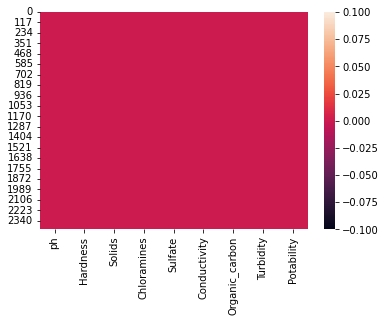

In [456]:
# Visualization heat map of null dataset
sns.heatmap(water_data.isnull())

We checked isnull() in the above cell and discovered that there is no colum missing in the dataset. Therefore ther is no null value

In [457]:
if water_data.ph.shape == water_data.Sulfate.shape == water_data['Turbidity'].shape:
  print("Continue further")
else:
  print("Error: Retry")

Continue further


In [458]:
water_data.corr()["Potability"]

ph                0.020500
Hardness         -0.005644
Solids            0.051362
Chloramines       0.011440
Sulfate          -0.016321
Conductivity     -0.008928
Organic_carbon   -0.009396
Turbidity         0.005258
Potability        1.000000
Name: Potability, dtype: float64

#Data Visualization#

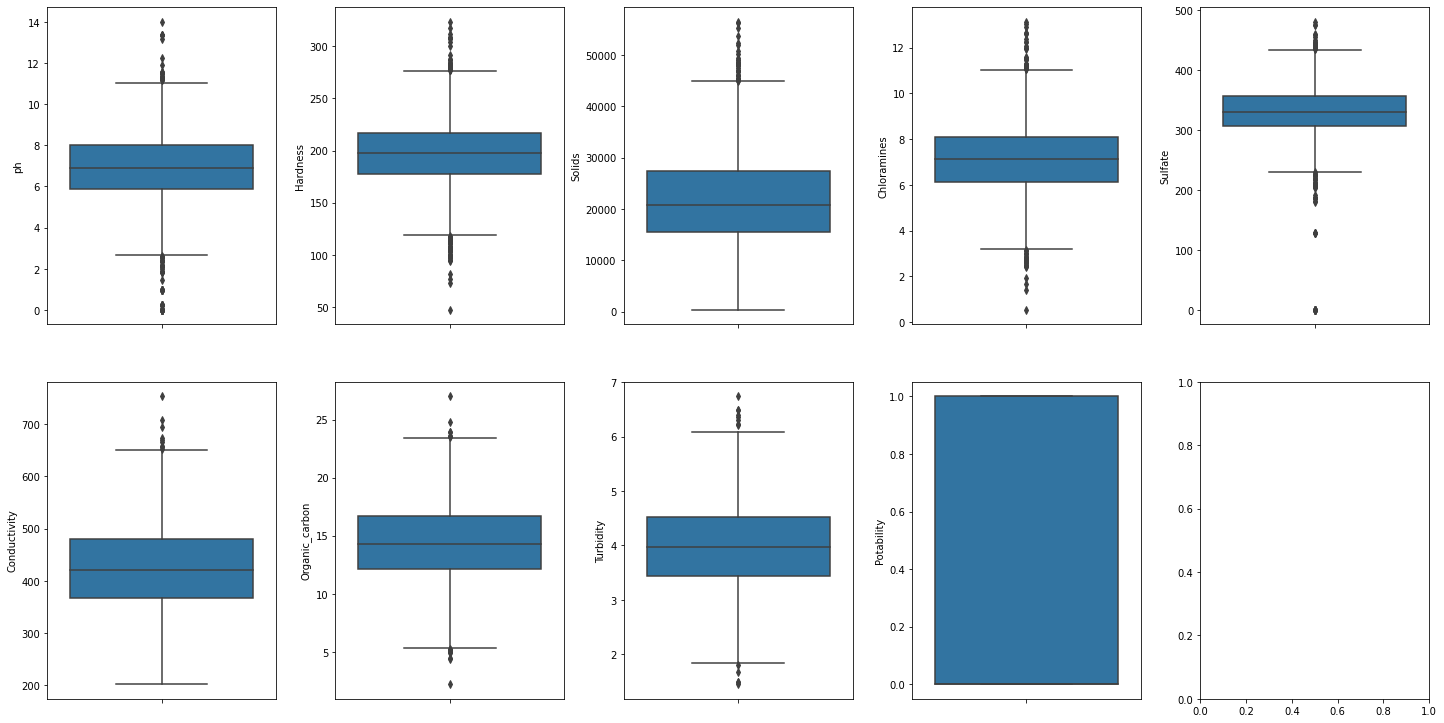

In [459]:
# Visualizing dataset a

fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in water_data.items():
    sns.boxplot(y=col, data=water_data, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f43c35aae80>,
      dtype=object)

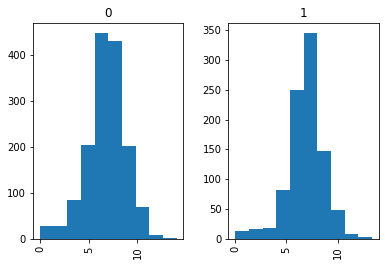

In [460]:
df.hist(column='ph', by='Potability')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f43c5f7c280>,
      dtype=object)

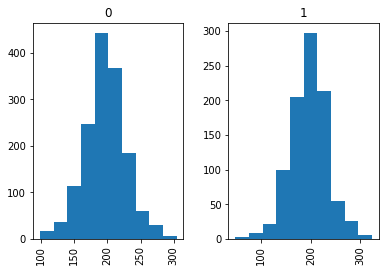

In [461]:
df.hist(column='Hardness', by='Potability')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



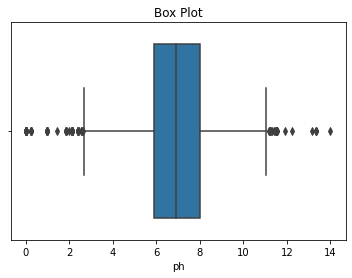

In [462]:
def Box(df):
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box(df['ph'])

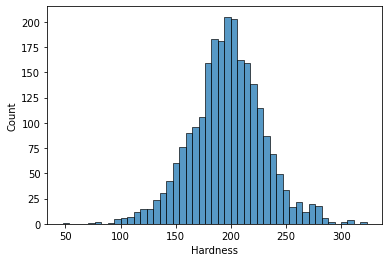

In [463]:
sns.histplot(x = "Hardness", data=df)

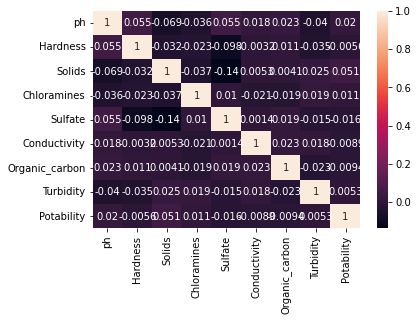

In [464]:
sns.heatmap(water_data.corr(), annot = True)
plt.show()

In [465]:

x = water_data.iloc[:, :-1]
y = water_data.iloc[:, -1]
print (x)
print (y)

             ph    Hardness       Solids  Chloramines     Sulfate  \
0      0.000000  204.890456  20791.31898     7.300212  368.516441   
1      3.716080  129.422921  18630.05786     6.635246  368.516441   
2      8.099124  224.236259  19909.54173     9.275884  368.516441   
3      8.316766  214.373394  22018.41744     8.059332  356.886136   
4      9.092223  181.101509  17978.98634     6.546600  310.135738   
...         ...         ...          ...          ...         ...   
2432   8.989900  215.047358  15921.41202     6.297312  312.931021   
2433   6.702547  207.321086  17246.92035     7.708117  304.510230   
2434  11.491011   94.812545  37188.82602     9.263166  258.930600   
2435   6.069616  186.659040  26138.78019     7.747547  345.700257   
2436   4.668102  193.681736  47580.99160     7.166639  359.948574   

      Conductivity  Organic_carbon  Turbidity  
0       564.308654       10.379783   2.963135  
1       592.885359       15.180013   4.500656  
2       418.606213       16

In [466]:
# Scaling the dataset to fit the model
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-3.5621829 ,  0.24944243, -0.13512356, ...,  1.72615763,
        -1.19995074, -1.28636787],
       [-1.62362609, -2.02673647, -0.38196505, ...,  2.0814914 ,
         0.24823513,  0.67098894],
       [ 0.66286394,  0.83293188, -0.23583291, ..., -0.0855627 ,
         0.75767761, -1.16822995],
       ...,
       [ 2.43229974, -3.07062118,  1.73766497, ...,  0.1791331 ,
         0.54773648,  0.50371905],
       [-0.39586389, -0.30043593,  0.47561952, ..., -0.11937501,
        -0.69074578, -0.3868536 ],
       [-1.12698771, -0.08862416,  2.92457273, ...,  1.25508736,
        -0.1396171 ,  0.58844961]])

In [467]:
# training x and y data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1949, 8) (488, 8) (1949,) (488,)


In [468]:
def sigmoid(z):
 return 1/(1+np.exp(-z))

In [469]:
def cost_function(x, y, w):
    """
    Calculate the costs of using Theta as a regression parameter in logistic regression.
    X: A data matrix of the form (m,n), where m is the number of probes and n is the number of characteristics.
    Y: Target vector (m,1)
    W: Coefficient vector (n,1)

  
    """
    m = y.shape[0]
    h = sigmoid (x.dot(w))
    J = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return J

In [470]:
def gradient_descent_function(x, y, weights, bais, learning_rate, iterations):
  m = len(y)
  cost_history = []

  for i in range(iterations):
    z = np.dot(x, weights) + bais
    h = sigmoid(z)
    loss = h - y
    gradient = np.dot(x.T, loss) / m
    weights = weights - learning_rate * gradient
    bias = b - learning_rate * np.mean(loss)

    cost = (-y * np.log(h) - (1-y) * np.log(1-h)).mean()
    cost_history.append (cost)

  return weights, bias, cost_history

In [471]:
# Initial  weights
w = np.random.randn(X_train.shape[1])
# Initial bias
b = 0

In [472]:
learning_rate = 0.015
iterations = 10000
weights, bias, cost_history = gradient_descent_function(X_train, y_train, w, b, learning_rate, iterations)
print(weights)
print(bias)
print(cost_history)

[ 0.09324077 -0.0048063   0.1064861   0.04305025 -0.02489364  0.0037936
 -0.03438121  0.01111143]
-0.0017416498071498318
[1.4486230184818907, 1.446857402068669, 1.4450932441743551, 1.443330548198786, 1.4415693175478985, 1.4398095556336572, 1.438051265874078, 1.4362944516931742, 1.4345391165209758, 1.4327852637934857, 1.4310328969526682, 1.4292820194464377, 1.427532634728619, 1.4257847462589641, 1.4240383575030873, 1.422293471932493, 1.4205500930245112, 1.4188082242623152, 1.4170678691348568, 1.4153290311368987, 1.4135917137689484, 1.4118559205372574, 1.4101216549537945, 1.4083889205362177, 1.406657720807861, 1.4049280592977078, 1.4031999395403594, 1.401473365076016, 1.3997483394504604, 1.398024866215012, 1.3963029489265304, 1.3945825911473628, 1.3928637964453416, 1.3911465683937196, 1.3894309105712035, 1.3877168265618625, 1.386004319955153, 1.3842933943458506, 1.38258405333405, 1.3808763005251266, 1.379170139529692, 1.3774655739635973, 1.3757626074478724, 1.374061243608705, 1.372361486

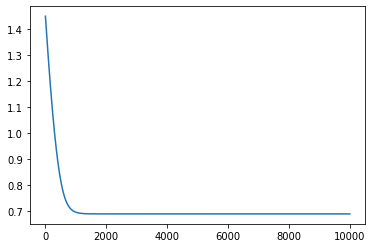

In [473]:
plt.plot(np.arange(iterations),cost_history)

In [474]:
def accuracy(x,y,w,bias):
  z = np.dot(x, w.T)+ bias
  A = sigmoid(z)
  A = A > 0.5
  A = np.array(A, dtype = "int64")
  acc = 1 - np.sum(np.abs(A - y)) / y.shape[0]
  return acc

In [475]:
accuracy(X_test, y_test, weights, bias)

0.5102459016393442

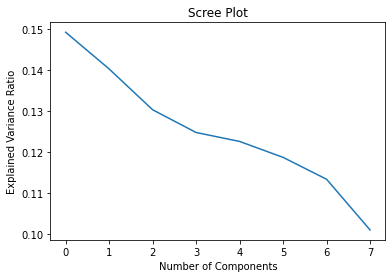

In [476]:
from sklearn.decomposition import PCA
# Apply PCA to your data
pca = PCA()
pca.fit(x)

# Plot the explained variance ratio of the PCA
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Components Number")
plt.ylabel("Variance Ratio")
plt.title("Scree Plot")
plt.show()

In [477]:
fig =  px.pie (df, names = "Potability", hole = 0.4, template = "gridon")
fig.show ()

In [478]:
pca = PCA(n_components=4)
X_reduced = pca.fit_transform(x)
X_reduced.shape

(2437, 4)

In [479]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1949, 8) (488, 8) (1949,) (488,)


In [480]:
# Initial random weights
w = np.random.randn(X_train.shape[1])
# Initial bias
b = 0

In [481]:
learning_rate = 0.015
iterations = 10000
weights, bias, cost_history = gradient_descent_function(X_train, y_train, w, b, learning_rate, iterations)
print(weights)
print(bias)
print(cost_history)

[ 0.08041387 -0.03308038  0.06043683  0.030604   -0.03034284 -0.01763117
 -0.02250653  0.04268828]
-0.0018325332579723042
[1.3026956351267398, 1.300991455873206, 1.29928910908498, 1.2975885995171277, 1.2958899319325445, 1.2941931110988236, 1.2924981417922583, 1.2908050287942336, 1.2891137768932672, 1.287424390883824, 1.2857368755676764, 1.2840512357514922, 1.2823674762493984, 1.2806856018803845, 1.2790056174707733, 1.2773275278518204, 1.275651337861108, 1.273977052342472, 1.2723046761444177, 1.2706342141223839, 1.2689656711364332, 1.2672990520528493, 1.265634361742925, 1.2639716050833143, 1.2623107869560715, 1.260651912248777, 1.2589949858534188, 1.2573400126675416, 1.2556869975935554, 1.2540359455389318, 1.2523868614153788, 1.250739750139746, 1.2490946166333923, 1.2474514658220865, 1.2458103026360956, 1.2441711320101703, 1.2425339588830184, 1.2408987881976725, 1.2392656249010106, 1.2376344739443497, 1.2360053402824456, 1.2343782288737468, 1.2327531446809008, 1.2311300926696533, 1.2295

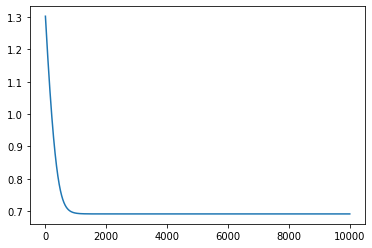

In [482]:
plt.plot(np.arange(iterations),cost_history)

In [483]:
accuracy(X_test, y_test, weights, bias)

0.5163934426229508

Because the target label does not have a linear association with the features, the logistic regression is considered to be one of the regressions that provides the least accurate results.